In [1]:
%matplotlib inline

import numpy as np
import pandas as pd
import seaborn as sns
import datetime as dt
import os
import matplotlib.pyplot as plt
from numpy import exp, abs, log
import pickle
from metrics import *

import universal as up
from universal import tools, algos
from universal.algos import *

<AxesSubplot:>

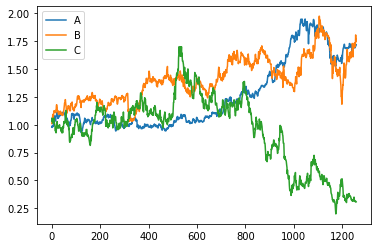

In [2]:
data = tools.dataset('tse')

# plot first three of them as example
data.iloc[:,:3].plot()

In [3]:
data

,A,B,C,D,E,F,G,H,I,J,...,,,,,,,,,,
0,0.977273,1.010790,1.057140,0.981366,1.000000,1.004310,1.014290,1.021510,1.000000,0.991803,...,0.992308,0.988095,1.008660,1.000000,1.018100,1.028990,0.993243,1.025000,1.105260,1.063120
1,0.988639,1.035969,1.028569,0.981366,0.992308,1.051723,1.028571,1.037640,0.994152,0.991803,...,1.084612,0.988095,1.038960,1.043480,1.040722,1.050733,0.986486,1.000000,1.144729,1.066448
2,0.988639,1.053953,1.028569,0.981366,0.992308,1.043102,1.042858,1.037640,0.999998,0.983607,...,1.023074,0.988095,1.064934,1.065216,1.058820,1.043486,0.993243,1.050000,1.184199,1.066448
3,0.982957,1.057547,1.042855,0.968944,0.999998,1.047411,1.114283,1.043015,0.999998,0.991800,...,1.015381,1.011908,1.073592,1.108698,1.054295,1.000007,1.020270,1.100001,1.144726,1.029903
4,0.988638,1.093514,1.014284,0.981366,1.007688,1.043100,1.128569,1.026885,1.017538,0.983604,...,0.980766,1.020388,1.090909,1.108698,1.072397,1.000007,1.013513,1.150007,1.131569,1.023258
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1254,1.709509,1.731276,0.309720,1.425260,2.498877,0.903328,4.154285,0.484345,2.842353,2.029976,...,0.184673,4.382357,0.910744,0.451729,1.624094,0.357779,2.008721,1.199974,2.105369,0.794756
1255,1.706694,1.729760,0.314291,1.431531,2.488814,0.906779,4.099141,0.495611,2.892180,2.021149,...,0.176781,4.412507,0.900356,0.442871,1.653653,0.366799,1.979006,1.229973,2.092211,0.813941
1256,1.706694,1.805627,0.310862,1.433421,2.482107,0.887815,4.043995,0.488853,2.969661,2.021149,...,0.164154,4.422568,0.928060,0.451729,1.651682,0.375819,1.967120,1.219974,2.144851,0.829015
1257,1.706694,1.744934,0.312006,1.423886,2.371417,0.886091,4.043995,0.473084,2.961358,2.007911,...,0.162575,4.312004,0.910745,0.442871,1.645769,0.378825,1.943347,1.219974,2.171168,0.811202


In [4]:
df_close = log(data)
ll = df_close.shape[0]

for i in list(range(1, ll))[::-1]:
    df_close.iloc[i] -= df_close.iloc[i-1]

In [5]:
df_close

,A,B,C,D,E,F,G,H,I,J,...,,,,,,,,,,
0,-0.022989,0.010732,0.055567,-0.018810,0.000000,0.004301,0.014189,0.021282,0.000000,-0.008231,...,-0.007722,-0.011976,0.008623,0.000000,0.017938,0.028578,-0.006780,0.024693,0.100081,0.061208
1,0.011563,0.024605,-0.027399,0.000000,-0.007722,0.046129,0.013982,0.015667,-0.005865,0.000000,...,0.088945,0.000000,0.029598,0.042561,0.021977,0.020910,-0.006826,-0.024692,0.035087,0.003125
2,0.000000,0.017211,0.000000,0.000000,0.000000,-0.008231,0.013794,0.000000,0.005863,-0.008298,...,-0.058411,0.000000,0.024693,0.020616,0.017241,-0.006921,0.006827,0.048790,0.033899,0.000000
3,-0.005764,0.003404,0.013794,-0.012739,0.007720,0.004121,0.066246,0.005167,0.000000,0.008295,...,-0.007547,0.023814,0.008097,0.040009,-0.004283,-0.042560,0.026846,0.046521,-0.033901,-0.034869
4,0.005763,0.033444,-0.027779,0.012739,0.007661,-0.004123,0.012739,-0.015585,0.017388,-0.008298,...,-0.034686,0.008345,0.016001,0.000000,0.017024,0.000000,-0.006644,0.044457,-0.011561,-0.006473
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1254,0.011602,0.019469,-0.011009,0.008851,0.031363,0.027080,-0.034786,0.037922,0.008801,0.010930,...,-0.066140,0.025551,-0.018833,0.019803,0.001209,-0.057159,0.005932,0.033899,0.000000,0.010396
1255,-0.001648,-0.000876,0.014652,0.004390,-0.004035,0.003813,-0.013363,0.022994,0.017378,-0.004357,...,-0.043675,0.006856,-0.011473,-0.019803,0.018036,0.024897,-0.014904,0.024693,-0.006270,0.023853
1256,0.000000,0.042925,-0.010969,0.001319,-0.002699,-0.021135,-0.013544,-0.013730,0.026437,0.000000,...,-0.074108,0.002277,0.030306,0.019803,-0.001193,0.024293,-0.006024,-0.008163,0.024849,0.018351
1257,0.000000,-0.034191,0.003673,-0.006674,-0.045620,-0.001944,0.000000,-0.032790,-0.002800,-0.006572,...,-0.009662,-0.025318,-0.018833,-0.019803,-0.003586,0.007968,-0.012159,0.000000,0.012195,-0.021722


In [13]:
cp = df_close
for phs in range(0, 100000):
    print('Phase: %d'%phs)
    ntrain = 300
    ntest = 100
    win = 5
    nstock = df_close.shape[1]
    choice = np.arange(nstock)
    
    train_st = phs*ntest
    train_ed = test_st = phs*ntest+ntrain
    test_st = phs*ntest+ntrain-win
    test_ed = phs*ntest+ntrain+ntest
    if test_ed > ll:
        break
    
    cp_train = cp.iloc[train_st:train_ed, :]
    cp_test = cp.iloc[test_st:test_ed, :]

    cp_trainx = np.zeros((ntrain - win, win * nstock))
    cp_trainy = np.zeros((ntrain - win, nstock))

    cov_train = np.cov(np.exp(cp_train.to_numpy().T))
    
    for i in range(win, ntrain):
        cp_trainy[i - win] = cp_train.to_numpy()[i]
        for s in range(nstock):
            cp_trainx[i - win, s * win:(s + 1) * win] = cp_train.to_numpy()[i - win:i, s]

    cp_testx = np.zeros((ntest, win * nstock))
    cp_testy = np.zeros((ntest, nstock))

    for i in range(win, ntest + win):
        cp_testy[i - win] = cp_test.to_numpy()[i]
        for s in range(nstock):
            cp_testx[i - win, s * win:(s + 1) * win] = cp_test.to_numpy()[i - win:i, s]

    np.savez('./stock_data/TSE_stock_phase%02d_lb%d' % (phs, win), rt_trainx=cp_trainx, rt_trainy=cp_trainy,  \
             rt_valx=None, rt_valy=None,  \
             rt_testx=cp_testx, rt_testy=cp_testy, choice=choice, cov_train=cov_train)
    
    print(np.min(cov_train))

Phase: 0
-0.00016718186133685665
Phase: 1
-0.00016620574706800422
Phase: 2
-0.00016391570138294274
Phase: 3
-0.00013051380716560791
Phase: 4
-0.00026621707764943155
Phase: 5
-0.00021684852461992203
Phase: 6
-0.00016201157215919705
Phase: 7
-0.00010471191656585272
Phase: 8
-0.00014878652422826042
Phase: 9
